In [1]:
import os
import tempfile
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr

# test

In [ ]:
path_CMCC_tasmin = "../data/tasminAdjust_FR-Metro_CMCC-CM2-SR5_ssp370_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc"
CMCC_tasmin = xr.open_dataset(path_CMCC_tasmin)

CMCC_tasmin

<xarray.Dataset> Size: 2GB
Dimensions:         (y: 134, x: 143, nbounds: 4, time: 31411, bnds: 2)
Coordinates:
  * y               (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * x               (x) float64 1kB 6e+04 6.8e+04 ... 1.188e+06 1.196e+06
  * time            (time) datetime64[ns] 251kB 2015-01-01T12:00:00 ... 2100-...
    lon             (y, x) float64 153kB ...
    lat             (y, x) float64 153kB ...
Dimensions without coordinates: nbounds, bnds
Data variables:
    lon_bnds        (y, x, nbounds) float64 613kB ...
    lat_bnds        (y, x, nbounds) float64 613kB ...
    LambertParisII  int32 4B ...
    tasminAdjust    (time, y, x) float32 2GB ...
    time_bnds       (time, bnds) datetime64[ns] 503kB ...
Attributes: (12/71)
    title:                           CNRM-ALADIN64E1 model output corrected o...
    summary:                         Data were post-processed by the Météo-Fr...
    id:                              hdl:21.14103/d0c607ca-9e9d-4490-9f34-180...
    Conventions:                     CF-1.11 ACDD-1.3
    standard_name_vocabulary:        CF Standard Name Table v81
    input_domain:                    Europe
    ...                              ...
    date_created:                    2025-11-08T06:29:17.012234
    product:                         bias-adjusted output
    license:                         https://cordex.org/data-access/cordex-cm...
    product_version:                 v1
    comment:                         Preliminary data released in the Fall 20...
    keywords:                        temperature, climate, France, minimal ne...

In [ ]:
tracc_15 = slice('1985-01-01','2014-12-31')
tracc20_CMCC = slice('2023-01-01','2042-12-31')
tracc20_IPSL = slice('2026-01-01','2045-12-31')

In [ ]:
CMCC_tasmin_tracc20 = CMCC_tasmin.sel(time=tracc20_CMCC)
CMCC_tasmin_tracc20_sum = CMCC_tasmin_tracc20.where(CMCC_tasmin_tracc20.tasminAdjust < 273.15 ).groupby('time.month').count('time')

In [ ]:
CMCC_tasmin_tracc20

<xarray.Dataset> Size: 562MB
Dimensions:         (y: 134, x: 143, nbounds: 4, time: 7305, bnds: 2)
Coordinates:
  * y               (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * x               (x) float64 1kB 6e+04 6.8e+04 ... 1.188e+06 1.196e+06
  * time            (time) datetime64[ns] 58kB 2023-01-01T12:00:00 ... 2042-1...
    lon             (y, x) float64 153kB ...
    lat             (y, x) float64 153kB ...
Dimensions without coordinates: nbounds, bnds
Data variables:
    lon_bnds        (y, x, nbounds) float64 613kB ...
    lat_bnds        (y, x, nbounds) float64 613kB ...
    LambertParisII  int32 4B ...
    tasminAdjust    (time, y, x) float32 560MB nan nan nan nan ... nan nan nan
    time_bnds       (time, bnds) datetime64[ns] 117kB ...
Attributes: (12/71)
    title:                           CNRM-ALADIN64E1 model output corrected o...
    summary:                         Data were post-processed by the Météo-Fr...
    id:                              hdl:21.14103/d0c607ca-9e9d-4490-9f34-180...
    Conventions:                     CF-1.11 ACDD-1.3
    standard_name_vocabulary:        CF Standard Name Table v81
    input_domain:                    Europe
    ...                              ...
    date_created:                    2025-11-08T06:29:17.012234
    product:                         bias-adjusted output
    license:                         https://cordex.org/data-access/cordex-cm...
    product_version:                 v1
    comment:                         Preliminary data released in the Fall 20...
    keywords:                        temperature, climate, France, minimal ne...

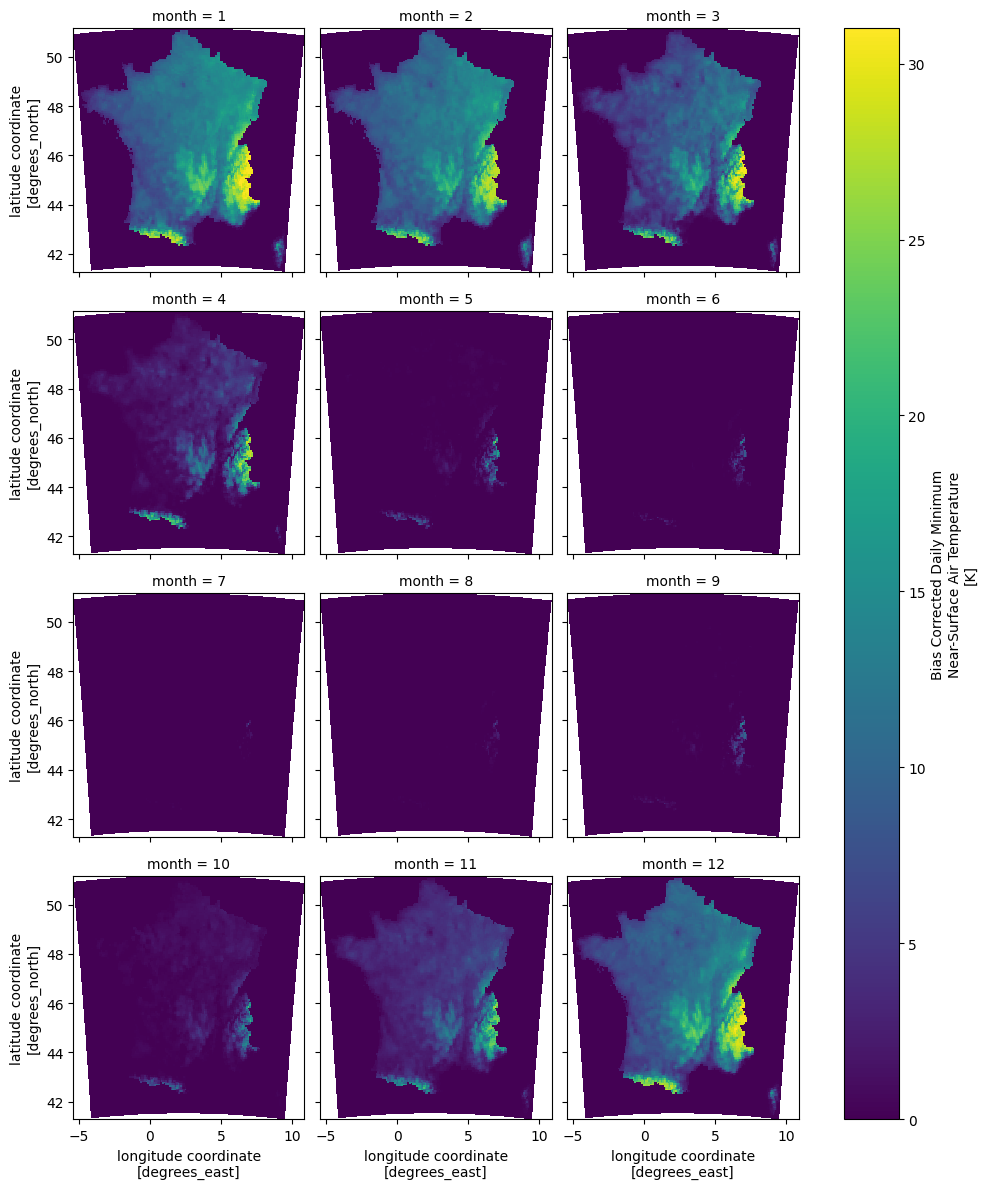

In [ ]:
CMCC_tasmin_tracc20_mens = CMCC_tasmin_tracc20_sum.tasminAdjust / 20
CMCC_tasmin_tracc20_mens.plot(x='lon',y='lat',col='month',col_wrap=3)

# script final

In [ ]:
param = dict(CMCC = dict(
                  path_min = "../data/tasminAdjust_FR-Metro_CMCC-CM2-SR5_ssp370_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc",
                  path_max = "../data/tasmaxAdjust_FR-Metro_CMCC-CM2-SR5_ssp370_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc",
                  path_histo_min = '../data/tasminAdjust_FR-Metro_CMCC-CM2-SR5_historical_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_19500101-20141231.nc',
                  path_histo_max = '../data/tasmaxAdjust_FR-Metro_CMCC-CM2-SR5_historical_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_19500101-20141231.nc',
                  tracc15 = slice('1985-01-01','2014-12-31'),
                  tracc20 = slice('2033-01-01','2050-12-31'),
                  tracc27 =  slice('2040-01-01','2059-12-31'),
                  tracc40 = slice('2070-01-01','2089-12-31'),   
                  ),
             
            #  NORD = dict(
            #      path ='/content/drive/MyDrive/Hackathon-climat/mf-hackathon-enr/data/SocleM-Climat-2025/RCM/EURO-CORDEX/EUR-12/NorESM2-MM/r1i1p1f1/CNRM-ALADIN64E1/ssp370/day/tasAdjust/version-hackathon-102025/tasAdjust_FR-Metro_NorESM2-MM_ssp370_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc',
            #      tracc20 = slice('2035-01-01','2054-12-31')
            #      ),
             IPSL = dict(path_min = "../data/tasminAdjust_FR-Metro_IPSL-CM6A-LR_ssp370_r1i1p1f1_HCLIMcom-DMI_HCLIM43-ALADIN_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc",
                         path_max = "../data/tasmaxAdjust_FR-Metro_IPSL-CM6A-LR_ssp370_r1i1p1f1_HCLIMcom-DMI_HCLIM43-ALADIN_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc",
                         path_histo_min = '../data/tasminAdjust_FR-Metro_IPSL-CM6A-LR_historical_r1i1p1f1_HCLIMcom-DMI_HCLIM43-ALADIN_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_19500101-20141231.nc',
                         path_histo_max = '../data/tasmaxAdjust_FR-Metro_IPSL-CM6A-LR_historical_r1i1p1f1_HCLIMcom-DMI_HCLIM43-ALADIN_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_19500101-20141231.nc',
                         tracc15 = slice('1985-01-01','2014-12-31'),
                         tracc20 = slice('2026-01-01','2045-12-31'),
                         tracc27 = slice('2046-01-01','2066-12-31'),
                         tracc40 = slice('2070-01-01','2089-12-31')
                         )
                  )

model = 'IPSL'
niveau_tracc = 15

path = param[model]['path_histo_max']
tracc = param[model]['tracc%d'%niveau_tracc]

ds = xr.open_dataset(path).sel(time=tracc)

tas = ds.tasmaxAdjust -273.15
# tas = ds.tasminAdjust -273.15

tas_dc = tas.where(tas > 30 ).groupby('time.month').count('time') / 30
# tas_dc = tas.where(tas < 0 ).groupby('time.month').count('time') / 30

path = '../data/'


for month in range(1,13) :
      file_name = path+'tasmax30_%s_tracc%02d_%02d.tif'%(model,niveau_tracc,month)
     #  file_name = path+'tasmin0_%s_tracc%02d_%02d.tif'%(model,niveau_tracc,month)
      da = tas_dc.sel(month=month)
      da.rio.write_crs("EPSG:27572", inplace=True)
      da.rio.write_nodata(np.nan, encoded=True, inplace=True)
      da.rio.to_raster(file_name)

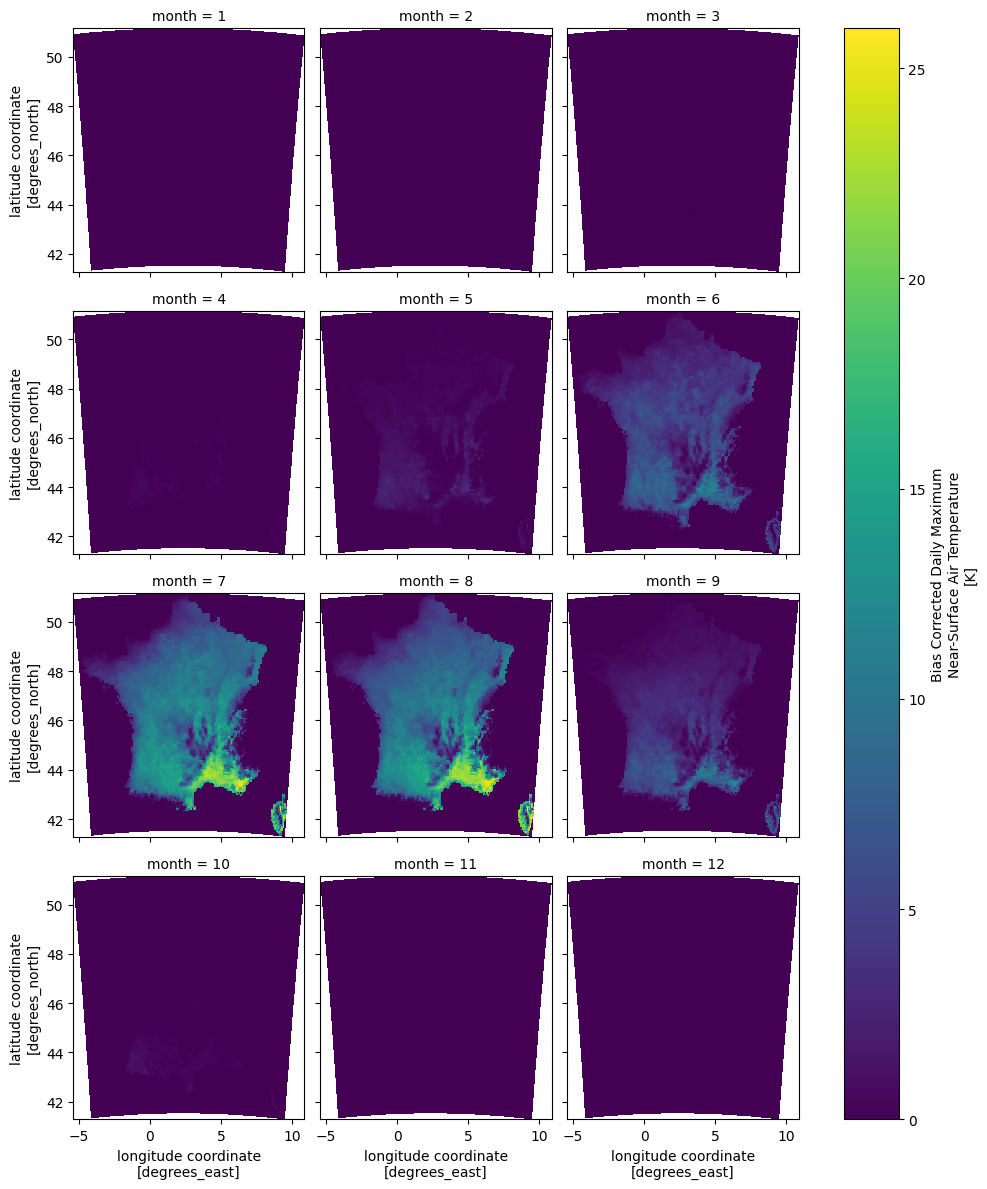

In [6]:
param = dict(CMCC = dict(
                  path_min = "../data/tasminAdjust_FR-Metro_CMCC-CM2-SR5_ssp370_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc",
                  path_max = "../data/tasmaxAdjust_FR-Metro_CMCC-CM2-SR5_ssp370_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc",
                  tracc20 = slice('2033-01-01','2050-12-31'),
                  tracc27 =  slice('2040-01-01','2059-12-31'),
                  tracc40 = slice('2070-01-01','2089-12-31'),   
                  ),
             
            #  NORD = dict(
            #      path ='/content/drive/MyDrive/Hackathon-climat/mf-hackathon-enr/data/SocleM-Climat-2025/RCM/EURO-CORDEX/EUR-12/NorESM2-MM/r1i1p1f1/CNRM-ALADIN64E1/ssp370/day/tasAdjust/version-hackathon-102025/tasAdjust_FR-Metro_NorESM2-MM_ssp370_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc',
            #      tracc20 = slice('2035-01-01','2054-12-31')
            #      ),
            # IPSL = dict(path = '',
            #             tracc20 = slice('2026-01-01','2045-12-31'),
            #             tracc27 = slice('2046-01-01','2066-12-31'),
            #             tracc40 = slice('2070-01-01','2089-12-31')
            #             )
                  )

model = 'CMCC'
niveau_tracc = 20

path = param[model]['path_max']
tracc = param[model]['tracc%d'%niveau_tracc]

ds = xr.open_dataset(path).sel(time=tracc)

tas = ds.tasmaxAdjust -273.15

tas_dc = tas.where(tas > 30 ).groupby('time.month').count('time') / 20

tas_dc.plot(x='lon',y='lat',col='month',col_wrap=3)